In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('C:/Users/sandi/Downloads/archive (15)/traffic.csv')  # Replace with your actual file path
print(data.head())
print(data.info())
print(data.describe())


              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
           Junction      Vehicles            ID
count  48120.000000  48120.000000  4.812000e+04
mean       2.180549     22.791334  2.016330e+10
std        0.966955     20.750063  5.944854e+06
min        1.000000      1.000000  2.015110e+10
25%        1.000000      9.000000

In [13]:
# check for missing values and fill them if there
if(data.isnull().sum().sum()==0):
    print('No missing values.')
else:
    data.fillna(method='ffill',inplace=True)

No missing values.


In [3]:
# Convert DateTime to datetime format and extract features
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['Hour'] = data['DateTime'].dt.hour
data['Day'] = data['DateTime'].dt.day
data['Month'] = data['DateTime'].dt.month
data['Weekday'] = data['DateTime'].dt.weekday

# Encode Junction as it is a categorical feature
le = LabelEncoder()
data['Junction'] = le.fit_transform(data['Junction'])

# Drop any unnecessary columns (e.g., DateTime, ID)
data = data.drop(columns=['DateTime', 'ID'])

# Check for missing values
data = data.fillna(data.mean())  # Impute missing values with mean


In [4]:
X = data.drop('Vehicles', axis=1)
y = data['Vehicles']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [7]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 7.323074731594785


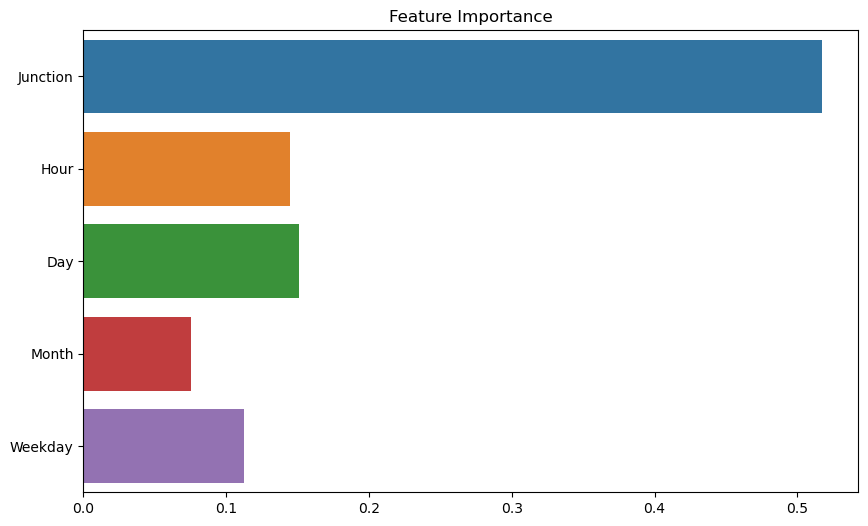

In [8]:
importance = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features)
plt.title('Feature Importance')
plt.show()


In [10]:
sample_data = pd.DataFrame({'Hour': [10], 'Day': [15], 'Month': [5], 'Weekday': [2], 'Junction': [1]})

# Ensure the sample data columns match the order in X_train
sample_data = sample_data.reindex(columns=X_train.columns)

# Predict traffic for the sample data
predicted_traffic = model.predict(sample_data)
print("Predicted traffic:", predicted_traffic)

Predicted traffic: [21.05]


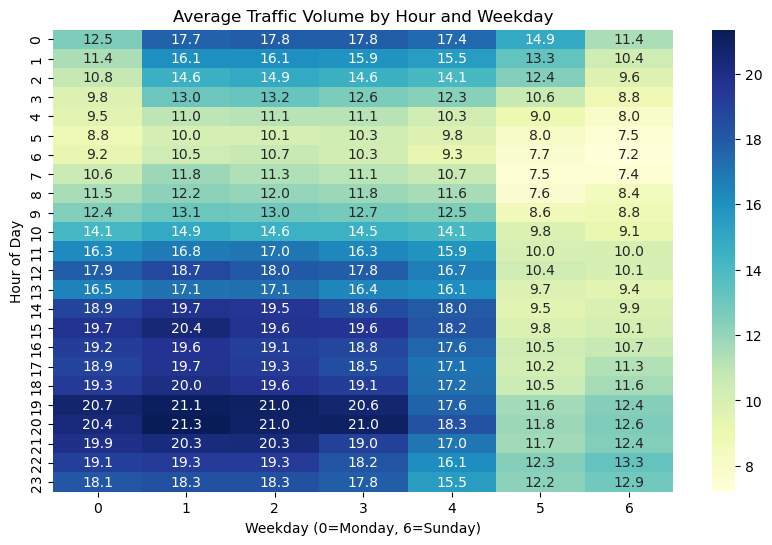

In [14]:
# Heatmap of Traffic Volume by Hour and Weekday
#This heatmap visualizes average traffic volume by hour and weekday, which helps reveal peak traffic times.
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Hour' and 'Weekday' to find the average traffic volume
traffic_by_time = data.groupby(['Hour', 'Weekday'])['Vehicles'].mean().unstack()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(traffic_by_time, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Average Traffic Volume by Hour and Weekday")
plt.xlabel("Weekday (0=Monday, 6=Sunday)")
plt.ylabel("Hour of Day")
plt.show()


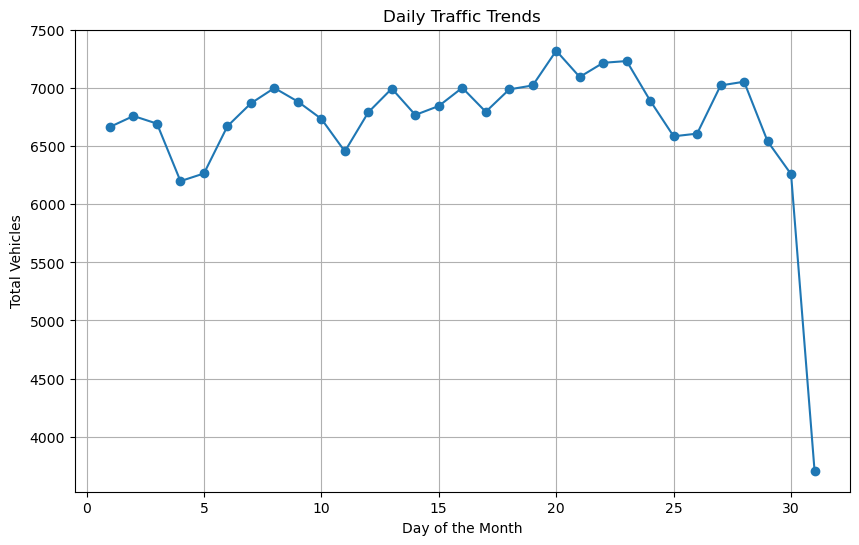

In [15]:
#Line Chart for Daily Traffic Trends
#This line chart shows trends in daily traffic volume over time, which can reveal patterns over the month or season.
# Group by Day and calculate total traffic volume for each day
daily_traffic = data.groupby('Day')['Vehicles'].sum()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(daily_traffic.index, daily_traffic.values, marker='o', linestyle='-')
plt.title("Daily Traffic Trends")
plt.xlabel("Day of the Month")
plt.ylabel("Total Vehicles")
plt.grid(True)
plt.show()



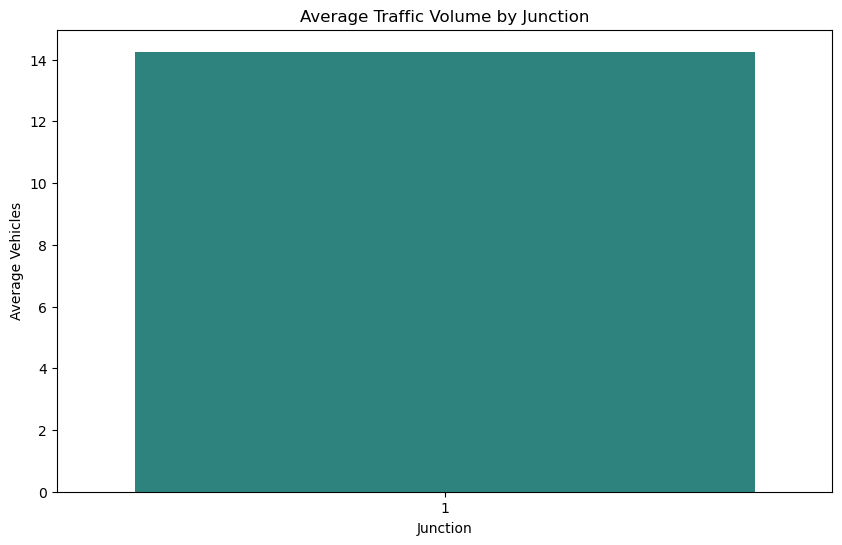

In [16]:
#Bar Plot for Traffic Volume by Junction
#A bar plot showing average traffic at each junction, allowing you to identify which junctions experience the highest traffic.
# Group by Junction to find average traffic
traffic_by_junction = data.groupby('Junction')['Vehicles'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=traffic_by_junction.index, y=traffic_by_junction.values, palette="viridis")
plt.title("Average Traffic Volume by Junction")
plt.xlabel("Junction")
plt.ylabel("Average Vehicles")
plt.show()


In [17]:
#Interactive User Input for Traffic Prediction
#This part allows the user to enter values interactively for a new prediction. After inputting values, the model will predict the expected traffic volume.
# Prompt the user to input data for prediction
hour = int(input("Enter the hour of the day (0-23): "))
day = int(input("Enter the day of the month (1-31): "))
month = int(input("Enter the month (1-12): "))
weekday = int(input("Enter the weekday (0=Monday, 6=Sunday): "))
junction = int(input("Enter the junction ID (0 or 1 based on your encoded values): "))

# Create a DataFrame for the new input data
input_data = pd.DataFrame({
    'Hour': [hour],
    'Day': [day],
    'Month': [month],
    'Weekday': [weekday],
    'Junction': [junction]
})

# Ensure the input data matches the training data structure
input_data = input_data.reindex(columns=X_train.columns)

# Predict the traffic volume
predicted_traffic = model.predict(input_data)
print(f"Predicted Traffic Volume: {predicted_traffic[0]}")


Enter the hour of the day (0-23): 5
Enter the day of the month (1-31): 2
Enter the month (1-12): 7
Enter the weekday (0=Monday, 6=Sunday): 5
Enter the junction ID (0 or 1 based on your encoded values): 1
Predicted Traffic Volume: 5.64


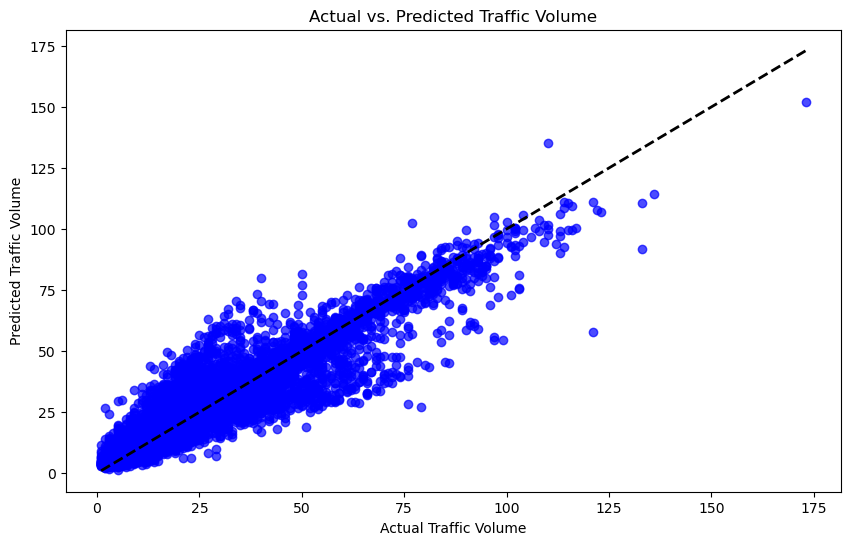

In [18]:
#Scatter Plot of Predicted vs. Actual Traffic Volumes
#After making predictions, plot them against the actual traffic volumes to visualize how well the model is performing.
# Predictions on the test set
y_test_pred = model.predict(X_test)

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.title("Actual vs. Predicted Traffic Volume")
plt.show()


In [ ]:
##Explanation of Each Visualization
#Heatmap of Traffic Volume by Hour and Weekday: This shows traffic patterns by hour and weekday, identifying peak traffic times.

#Line Chart for Daily Traffic Trends: This line chart provides insights into daily traffic trends, helping to spot seasonal or daily peaks.

#Bar Plot for Traffic Volume by Junction: By plotting traffic volume for each junction, you can identify high-traffic areas, which could help inform traffic control measures.

#Interactive Prediction Input: This allows you to make on-the-spot predictions by entering values for time and location parameters.

#Scatter Plot of Predicted vs. Actual Traffic Volumes: This plot shows the model’s accuracy by comparing predicted values to actual values. Ideally, the points should lie close to the diagon0al line (perfect prediction).
  # These visualizations provide comprehensive insights into traffic patterns and help evaluate the predictive model’s performance. Let me know if you need more customization or additional visualizations! 